

# TMDB Movies DataSet Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Is there any consistent formula which helps a movie to break the records at box-office? Are the movies which are a commercial success are highly-rated?Which genres are most popular from year to year?. This DataSet contains information about 10000 movies collected from TMDB Database , including movie rating and revenue it generated.

#### Attributes:
  - __id__ : id of the movie
  - __imdb_id__ : id of the movie in imdb database
  - __popularity__ : cumulative decided by number of star ratings
  - __budget__ : budget of the movie
  - __revenue__ : revenue generated by the movie
  - __original_title__ : title of the movie
  - __cast__ : cast of the movie seperated by '|' symbol
  - __homepage__ : link to the homepage of the movie
  - __director__ : name of the director of the movie
  - __tagline__ : tagline of the movie
  - __keywords__ : keywords related to the movie
  - __overview__ : summary of the movie 
  - __runtime__ : runtime of the movie in minutes
  - __genres__ : genres of the movie seperated by pipe symbol '|'
  - __production_companies__ : production companies for the movie seperated by pipe symbol
  - __release_date__ : release date of the movie in MM/DD/YY format 
  - __vote_count__ : no. of votes or ratings
  - __vote_average__ : average of ratings of the movie
  - __release_year__ : release year of the movie
  - __budget_adj__ : budget of the movie in terms of 2010 dollars, accounting for inflation over time.
  - __revenue_adj__ : revenue of the movie in terms of 2010 dollars, accounting for inflation over time.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import operator
from wordcloud import WordCloud,ImageColorGenerator
%matplotlib inline

### Functions to Reuse:

In [2]:
def Details(df):
    print("No. of rows in Dataset are",df.shape[0])
    print("No. of columns in Dataset are",df.shape[1])
    print('----------------------------------------------------------------------------------\n')
    print(df.info())
    print('----------------------------------------------------------------------------------\n')
    print(df.describe())

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [3]:
df_v1=pd.read_csv('tmdb-movies.csv')
df_v1.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
Details(df_v1)

No. of rows in Dataset are 10866
No. of columns in Dataset are 21
----------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               


### Data Cleaning
we can see that there are some unnecessary columns which are to be deleted and there are some rows which are also to be deleted because they have null values which cannot be imputed with mean as they are categorical. We need to delete the duplicate rows which are present in dataset.

In [5]:
df_v1.drop(['homepage','tagline','keywords','imdb_id','overview','cast','id'],axis=1,inplace=True) 
#Dropping unnecessary columns as They'll be of no use in our analysis 

In [6]:
df_v1.duplicated().sum() #find No. of duplicated rows in DataSet, in this case it is 1.

1

In [7]:
df_v1[df_v1.duplicated()] #this is the duplicated line which have to drop

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
df_v1.drop_duplicates(inplace=True)#removing duplicated rows.

In [9]:
df_v1.duplicated().any() #just ensure there are no duplicate rows left

False

In [10]:
df_v1.isnull().sum() 
#Here We can see There are more than 1000 null values in production_companies column. 
#it has Categorical variables,therefore they cannot be imputed!
#As it has large proportion of null values, If I delete those rows, it might affect the data for a fair analysis.
#Hence, production_companies column should also be removed as it should not affect the results of analysis of other columns

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
df_v1.drop(['production_companies'],axis=1,inplace=True)

In [12]:
#remove the rows in which any other column is null! as the no. of rows which willb be removed is less, They might not affect the analysis
df_v1.dropna(how='any',axis=0,inplace=True)

In [13]:
df_v1.isnull().sum() #to ensure that we dont have null values.

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [14]:
df_v1.nunique() #To check now many unique values are there in each column

popularity        10750
budget              556
revenue            4702
original_title    10507
director           5056
runtime             245
genres             2031
release_date       5886
vote_count         1289
vote_average         71
release_year         56
budget_adj         2610
revenue_adj        4839
dtype: int64

In [15]:
df_v1.rename(columns={'original_title':'title'},inplace= True) #for better understanding of the column name

In [16]:
df_v1['release_date']=pd.to_datetime(df_v1['release_date'],format='%m/%d/%y') #converting the string to timestamp.

In [17]:
cleaned = df_v1.genres.str.split('|', expand=True)
cleaned.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [18]:
cleaned.columns=['genre_1','genre_2','genre_3','genre_4','genre_5']

In [19]:
df_v1=pd.concat([df_v1,cleaned],axis=1)

In [20]:
df_v1.drop(['genres'],axis=1,inplace=True)

In [21]:
df_v1.head()

,popularity,budget,revenue,title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


We have 2 columns for budget and revenue called budget_adj and revenue_adj respectively which have adjusted values of budget and revenue in terms of 2010 dollars , accounting for inflation over time. Therefore we can drop budget and revenue columns

In [22]:
df_v1.drop(['budget','revenue'],axis=1,inplace=True)

The values in budget_adj and revenue_adj are in form of exponentials . Therfore, 1e8 is a million and 1e9 is a billion. we can just divide the variables by 1e8 to convert them into millions.

In [23]:
df_v1['budget_adj']=df_v1['budget_adj']/(1e8)  # converting them in terms of million dollars
df_v1['revenue_adj']=df_v1['revenue_adj']/(1e8) 

In [24]:
df_v1['budget_adj']=df_v1['budget_adj'].round(3) #to round them to 2 decimal places
df_v1['revenue_adj']=df_v1['revenue_adj'].round(3)

In [25]:
df_v1.rename(columns={'budget_adj':'budget_ml','revenue_adj':'revenue_ml'},inplace=True)# to signify they are in million dollars
#in terms of 2010

In [26]:
df_v1.head()

,popularity,title,director,runtime,release_date,vote_count,vote_average,release_year,budget_ml,revenue_ml,genre_1,genre_2,genre_3,genre_4,genre_5
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.380,13.924,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.380,3.482,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012,2.716,Adventure,Science Fiction,Thriller,None,None
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.840,19.027,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.748,13.857,Action,Crime,Thriller,None,None


In [27]:
#Check how many budget values are 0
df_v1[df_v1['budget_ml']==0].shape[0]


5722

In [28]:
#check how many revenue values are 0 
df_v1[df_v1['revenue_ml']==0].shape[0]

6124

As budget is Zero for 5722 movies  and revenue is Zero for 6124 values 
Budget 0 means may the data is note recorded correctly! therefore they may affect our analysis.
Therefore we can use genre and release_year columns to impute 0 values in budget_adj
for this we can use transform() and groupby() functions together

In [29]:
df_v1.groupby(['release_year','genre_1'],as_index=False).mean().loc[:,['release_year','genre_1','budget_ml','revenue_ml']]
#Here is how I can use release_year and genre_1 values to fill 0 budget_ml and revenue_ml values 
#It is not sure that we can completely impute all 0 values in both the columns but we can reduce the number by great extent.
                                                                                            

,release_year,genre_1,budget_ml,revenue_ml
0,1960,Action,0.129000,0.598250
1,1960,Adventure,0.000000,0.000000
2,1960,Comedy,0.063429,0.506429
3,1960,Crime,0.000000,0.000000
4,1960,Drama,0.011800,0.471800
...,...,...,...,...
823,2015,Science Fiction,0.220095,0.528429
824,2015,TV Movie,0.000000,0.000000
825,2015,Thriller,0.035889,0.066153
826,2015,War,0.490667,1.995000


In [30]:
#Applying transfrom and replace functions to replace all 0 values in both the columns by mean after grouping by release_year and genre_1
df_v1.loc[:,['budget_ml','revenue_ml']]=df_v1.groupby(['release_year','genre_1']).transform(lambda x: x.replace(0.00,x.mean()))

In [31]:
#Now after applying transform if we check the number Zero values we can see a drastic decrease.
df_v1[df_v1['budget_ml']==0].shape[0]

274

In [32]:
df_v1[df_v1['revenue_ml']==0].shape[0]

420

how we can just discard these rows as they are very few and will not significantly affect our analysis.

In [33]:
df_v1=df_v1[df_v1['budget_ml']!=0]
df_v1=df_v1[df_v1['revenue_ml']!=0]

In [34]:
df_v1['gross']=df_v1['revenue_ml']-df_v1['budget_ml'] # This signifies the gross(profit/loss) of a movie 
#which can be calculated by (budget-revenue)

In [35]:
df_v1.index=range(1,10327) #rearrange the index as we removed some of the rows in the dataset
Details(df_v1) #printing all the required details after cleaning the dataset

No. of rows in Dataset are 10326
No. of columns in Dataset are 16
----------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10326 entries, 1 to 10326
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10326 non-null  float64       
 1   title         10326 non-null  object        
 2   director      10326 non-null  object        
 3   runtime       10326 non-null  int64         
 4   release_date  10326 non-null  datetime64[ns]
 5   vote_count    10326 non-null  int64         
 6   vote_average  10326 non-null  float64       
 7   release_year  10326 non-null  int64         
 8   budget_ml     10326 non-null  float64       
 9   revenue_ml    10326 non-null  float64       
 10  genre_1       10326 non-null  object        
 11  genre_2       8114 non-null   object        
 12  genre_3       4839 non-null   object

In [36]:
df_v1.head()

,popularity,title,director,runtime,release_date,vote_count,vote_average,release_year,budget_ml,revenue_ml,genre_1,genre_2,genre_3,genre_4,genre_5,gross
1,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.380,13.924,Action,Adventure,Science Fiction,Thriller,None,12.544
2,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.380,3.482,Action,Adventure,Science Fiction,Thriller,None,2.102
3,13.112507,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012,2.716,Adventure,Science Fiction,Thriller,None,None,1.704
4,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.840,19.027,Action,Adventure,Science Fiction,Fantasy,None,17.187
5,9.335014,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015,1.748,13.857,Action,Crime,Thriller,None,None,12.109


<a id='eda'></a>
## Exploratory Data Analysis


###  Which is the most common genre?

In [37]:
a=df_v1['genre_1'].value_counts()
b=df_v1['genre_2'].value_counts()
c=df_v1['genre_3'].value_counts()
d=df_v1['genre_4'].value_counts()
e=df_v1['genre_5'].value_counts()
li=[b,c,d,e]
for i in li:
    a=a.add(i,fill_value=0)
total_genre_count=a
print(total_genre_count.sort_values(ascending= False))


Drama              4617.0
Comedy             3672.0
Thriller           2809.0
Action             2330.0
Romance            1652.0
Horror             1558.0
Adventure          1425.0
Crime              1312.0
Science Fiction    1155.0
Family             1143.0
Fantasy             870.0
Mystery             752.0
Animation           648.0
Documentary         448.0
Music               349.0
History             306.0
War                 234.0
Foreign             172.0
Western             136.0
TV Movie             85.0
dtype: float64


Text(0.5, 0, 'Genres')

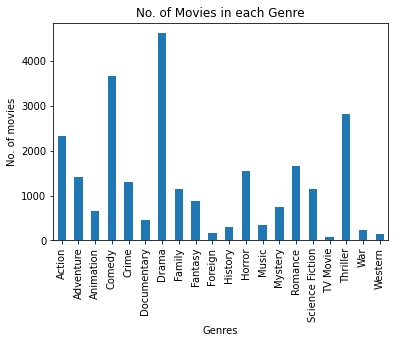

In [38]:
ax=total_genre_count.plot.bar(title="No. of Movies in each Genre")
ax.set_ylabel("No. of movies")
ax.set_xlabel("Genres")

From the above bar graph we can see that __Drama__ is the genre with most no. of movies and __TV Movie__ is the genre with least no. of movies.

### is there any trend in Average of budget across the time period?

Text(0, 0.5, 'Budget')

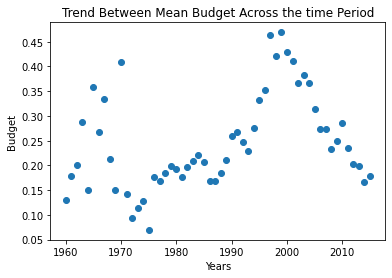

In [39]:
budget_trend=df_v1.groupby(['release_year']).budget_ml.mean()
plt.scatter(budget_trend.index,budget_trend)
plt.title("Trend Between Mean Budget Across the time Period")
plt.xlabel('Years')
plt.ylabel('Budget')

We can see that there is __no correlation__ between __budget__ and __year___. But, we can see that there is a peak in budget around 2000 and then again it has come decreasing

### Maximum no. of movies released in which year?


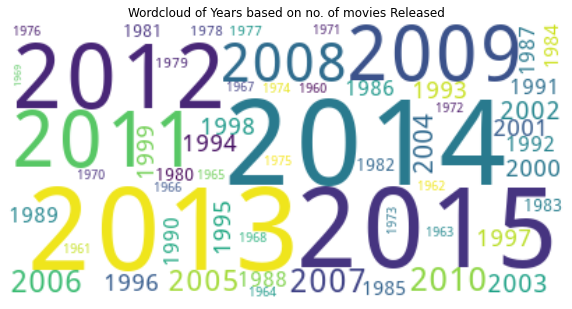

In [40]:
counts=df_v1['release_year'].value_counts()
counts.index=counts.index.astype(str)
wordcloud= WordCloud(background_color='white').generate_from_frequencies(counts)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of Years based on no. of movies Released")
plt.show()


[Text(0, 0.5, 'No. of movies'),
 Text(0.5, 0, 'Years'),
 Text(0.5, 1.0, 'Trend between year and no. of movies')]

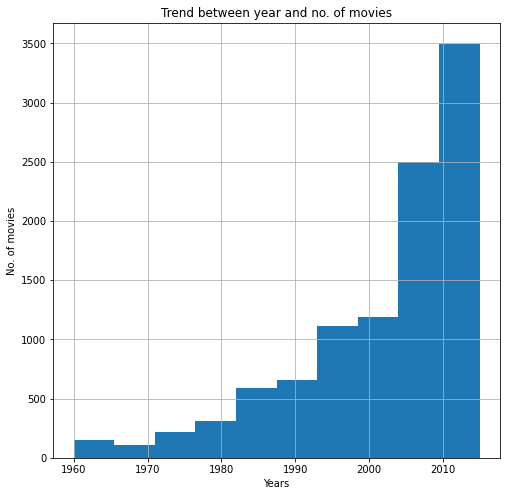

In [72]:
yearsgraph=df_v1.release_year.hist(figsize=(8,8))
yearsgraph.set(ylabel='No. of movies',xlabel='Years',title="Trend between year and no. of movies")

From the histogram plotted above we can say that there is positive correlation between no. of movies released and release_year.

### Is there any trend between runtime of a movie and its popularity?

Text(0, 0.5, 'Popularity')

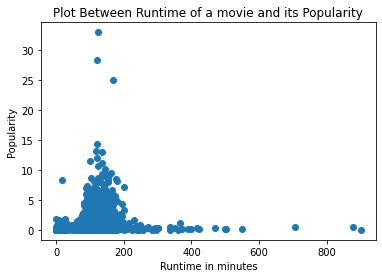

In [42]:
plt.scatter(df_v1.runtime,df_v1.popularity)
plt.title("Plot Between Runtime of a movie and its Popularity")
plt.xlabel('Runtime in minutes')
plt.ylabel('Popularity')

from the above graph we can say that movies with runtime between 100 min and 200 min became more popular compared to movies with runtime out of this range 

<a id='yeargenre'></a>
### Which genre has generated more revenue in each year?

In [43]:
genre_columns=['genre_1','genre_2','genre_3','genre_4','genre_5']
l=[]
for i in genre_columns:
    l+=df_v1[i].unique().tolist()
l=list(set(l))
del l[l.index(None)]
finallist=[]
dict_genres={}
for i in l:
    dict_genres[i]=0
df_year=df_v1.groupby(['release_year'])
for year,df_group in df_year:
    for rowindex,row in df_group.iterrows():
        for i in genre_columns:
            if(row[i]==None):
               continue 
            genre=row[i]
            dict_genres[genre]=dict_genres.get(genre)+row['revenue_ml']
    max_genre=max(dict_genres.items(), key = operator.itemgetter(1))[0] 
    finallist.append((year,max_genre))
    dict_genres=dict.fromkeys(dict_genres,0)
for i in finallist:
    print(i[0],i[1])

1960 Drama
1961 Adventure
1962 Adventure
1963 Drama
1964 Comedy
1965 Drama
1966 Drama
1967 Adventure
1968 Drama
1969 Drama
1970 Drama
1971 Action
1972 Drama
1973 Drama
1974 Thriller
1975 Horror
1976 Drama
1977 Adventure
1978 Horror
1979 Drama
1980 Action
1981 Adventure
1982 Science Fiction
1983 Action
1984 Action
1985 Drama
1986 Drama
1987 Comedy
1988 Comedy
1989 Comedy
1990 Comedy
1991 Action
1992 Comedy
1993 Drama
1994 Drama
1995 Drama
1996 Drama
1997 Thriller
1998 Drama
1999 Drama
2000 Comedy
2001 Comedy
2002 Drama
2003 Action
2004 Comedy
2005 Drama
2006 Comedy
2007 Comedy
2008 Drama
2009 Adventure
2010 Adventure
2011 Action
2012 Action
2013 Action
2014 Action
2015 Action


<a id='top10movies'></a>
### Top 10 High rated movies?(Based on vote_average and revenue)

In [44]:
df_sorted=df_v1.sort_values(['vote_average','revenue_ml'],ascending=[False,False])
final=df_sorted.head(10)['title']
final.index=range(1,11)
print(final)

1           The Story of Film: An Odyssey
2                    The Mask You Live In
3           Black Mirror: White Christmas
4                             Life Cycles
5                       Pink Floyd: Pulse
6                       The Art of Flight
7     Dave Chappelle: Killin' Them Softly
8                  Bill Hicks: Relentless
9                The Shawshank Redemption
10                      Guten Tag, RamÃ³n
Name: title, dtype: object


<a id='eachgenre'></a>
### What are the Top Movies in each genre?(Based on Revenue)

In [45]:
genre_columns=['genre_1','genre_2','genre_3','genre_4','genre_5']
l=[]
for i in genre_columns:      #making list of genres from all 5 columns 
    l+=df_v1[i].unique().tolist()  
l=list(set(l))  #generate a unique list of all genres present in our dataset
del l[l.index(None)]   #delete None genre as it signifies nothing
title_genres={}
for i in l:         # initialising a dict with genres with ('',0) values
    title_genres[i]=('',0)
for rowindex,row in df_v1.iterrows(): #iterate over all rows and 5 columns and update the values in title_genres
    for i in genre_columns:
            if(row[i]==None):
                continue 
            genre=row[i]
            rev=row['revenue_ml']
            if(title_genres.get(genre)[0]==''):
                title_genres[genre]=(row['title'],rev)
            else:
                if(title_genres.get(genre)[1]<rev):     #comparing revenue
                    title_genres[genre]=(row['title'],rev)
for key,value in title_genres.items(): #print genre ----- top movie in that genre.
    print(key+'----',value[0])
    

War---- Doctor Zhivago
Thriller---- Titanic
History---- The Message
Family---- E.T. the Extra-Terrestrial
Adventure---- Avatar
Horror---- The Exorcist
Fantasy---- Avatar
Animation---- One Hundred and One Dalmatians
Comedy---- One Hundred and One Dalmatians
Romance---- Titanic
Crime---- The Net
Documentary---- The Summit
Mystery---- The Net
Action---- Avatar
Science Fiction---- Avatar
Music---- The Sound of Music
Foreign---- The Dogs of War
Drama---- Titanic
TV Movie---- The Star Wars Holiday Special
Western---- Dances with Wolves


<a id='weekdaymovies'></a>
### No. of movies released on each day of the week

In [46]:
dict_week={'Monday':0,'Tuesday':0,'Wednesday':0,'Thursday':0,'Friday':0,'Saturday':0,'Sunday':0}
days=list(dict_week.keys())
for i in df_v1['release_date']:
    d=i.dayofweek
    dict_week[days[d]]=dict_week.get(days[d])+1
for day,nmovies in dict_week.items():
    print(day+'---',nmovies)


Monday--- 609
Tuesday--- 1100
Wednesday--- 1454
Thursday--- 1643
Friday--- 4138
Saturday--- 735
Sunday--- 647


In [47]:
df_v1['day_of_week']=df_v1['release_date'].apply(lambda x: x.dayofweek)
df_grouped_day=df_v1.groupby(['day_of_week']).gross.mean()
df_grouped_day

day_of_week
0    0.604615
1    0.700002
2    0.803372
3    0.624284
4    0.395522
5    0.356756
6    0.492866
Name: gross, dtype: float64

In [48]:
df_grouped_day=df_v1.groupby(['day_of_week']).vote_average.mean()
df_grouped_day

day_of_week
0    5.940558
1    5.840636
2    6.118569
3    6.007182
4    5.912276
5    5.933605
6    6.075889
Name: vote_average, dtype: float64

<a id='conclusions'></a>
## Conclusions
  - 
 ### Question1- Which is the most common genre?:
       > after my analysis , I concluded that **Drama** is the most common genre of all with 4617** movies.__TV Movie__ is the least common genre with just **85** movies. and plotted a bar graph
 ###  Question 2- Is there any trend in Average of budget across the time period?
       > I found no __correlation__ between mean budget and year. But I see there is a peak point around year 2000 and then again it has decreased.
 ### Question 3- Maximum no. of movies released in which year?
       > There is __positive__ correlation between no. of movies released and release_year. The Maximum No. of movies are released in 2014.
 ### Question 4- Is there any trend between runtime of a movie and its popularity?
       > We can say that movies with runtime in range of 100-200  beacame more popular compared to movies with runtime which are not in that range.
 ### Question 5- Which genre has generated more revenue in each year?
       > I have generated a <a href="#yeargenre">__Year--Genre__</a> list where you can find top genre for each year        
 ### Question 6- Top 10 High rated movies?(Based on vote_average and revenue)
       > Here you can find the <a href="#top10movies">__Top 10__</a> High rated movies.
 ### Question 7-What are the Top Movies in each genre?(Based on Revenue)
       > Here is the list for <a href='eachgenre'>__TopMovies__</a> in each genre
 ### Question 8 - No. of movies released on each day of the week
       >  Here is the <a href='#weekdaymovies'>__List__</a> to know no. of movies released on each day of the week. I found that more number of movies are released on __Friday__ but suprisingly when I tried to explore for why by seeing the mean gross and mean vote_average, I found that movies released on **Tuesday** have high gross and rating compared to **Friday**

### REFERENCES: N/A